# Multidimensional Non Linear Regression

An example of a multidimensional non-linear regression analysis. <br><br>
**Sections**
- [1.0 Reading Data](#1.0-Reading-Data)
- [2.0 Model & Newton Raphson Set-up](#2.0-Model-&-Newton-Raphson-Set-up)
- [3.0 NR Implementation](#3.0-NR-Implementation)
- [4.0 Variance of Estimator](#4.0-Variance-of-Estimator)
 - [4.1 Variance of Estimator with Parametric Bootstrap](#4.1-Variance-of-Estimator-with-Parametric-Bootstrap)
 - [4.2 Variance of Estimator with Non-Parametric Bootstrap](#4.2-Variance-of-Estimator-with-Non-Parametric-Bootstrap)
 - [4.3 Variance of Estimator with Formula](#4.3-Variance-of-Estimator-with-Formula)
- [5.0 Predicting Values](#5.0-Predicting-Values)

### Importing Modules

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

## 1.0 Synthetic Data

\begin{align}
\large
y_i = \theta_1 {\rm e}^{-\theta_2x_i} + \sigma \epsilon_i
\end{align}

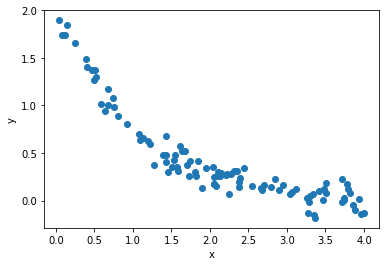

In [2]:
n = 100
theta_1 = 2
theta_2 = 1
sigma = 0.1
ei = np.random.normal(loc = 0.0, scale = 1, size = (n,1))
xi = np.random.uniform(low=0.0, high=4.0, size = (n,1))
yi = theta_1 * np.exp(- theta_2 * xi) + sigma * ei
plt.scatter(xi, yi)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2.0 Model & Newton Raphson Set-up

\begin{align}
\large
I(\theta) & = \frac{1}{2} \Sigma_{i=1}^{n}(y_i - \theta_1 {\rm e}^{-\theta_2x_i})^{2}
\\
\\
\large
I'(\theta) &= (\dfrac{\partial L}{\partial \theta_1}, \dfrac{\partial L}{\partial \theta_2})
\\
\\
\large
J(\theta_1,\theta_2) = J(a,b) & =\begin{pmatrix}
    \dfrac{\partial^2 L}{\partial a^2}   & \dfrac{\partial^2 L}{\partial a \hspace{1mm} \partial b}\\
    \dfrac{\partial^2 L}{\partial a \hspace{1mm} \partial b}   & \dfrac{\partial^2 L}{\partial b^2}
\end{pmatrix}
\\
\\
\theta_{t+1} &= \theta_{t} - J^{-1}(\theta(t))  I'(\theta(t)) 
\end{align}

Compute Derivatives

\begin{align}
\large
I'(\theta) = (\dfrac{\partial L}{\partial \theta_1}, \dfrac{\partial L}{\partial \theta_2})
\\ 
\large
\dfrac{\partial L}{\partial \theta_1} = \Sigma_{i=1}^{n} (y_i - \theta_1 {\rm e}^{-\theta_2x_i}) (-{\rm e}^{-\theta_2x_i})
\\
\large
\dfrac{\partial L}{\partial \theta_2} = \Sigma_{i=1}^{n} (y_i - \theta_1 {\rm e}^{-\theta_2x_i}) (\theta_1 x_i{\rm e}^{-\theta_2x_i})
\\
\\
\large
\dfrac{\partial^2 L}{\partial \theta_1^2} = \Sigma_{i=1}^{n} (-{\rm e}^{-2\theta_2x_i})
\\
\large
\dfrac{\partial^2 L}{\partial \theta_2^2} = \Sigma_{i=1}^{n} (y_i - 2\theta_1 {\rm e}^{-\theta_2x_i})
(\theta_1 x_i^2{\rm e}^{-\theta_2x_i})
\end{align}

In [3]:
def get_J_and_Lprime(xi, yi, theta_1, theta_2):
    """Computes J matrix and L vector for the model.
    """    
    exp_t2 = np.exp(-theta_2*xi)    

    # Get derivatives for NR
    dL_dtheta_1 = np.sum( (yi - theta_1*exp_t2)*-exp_t2)
    dL_dtheta_2 = np.sum( (yi - theta_1*exp_t2)*(theta_1*xi*exp_t2))
                   

    # Second Partial Derivatives
    d2L_dtheta_1 = np.sum(-np.exp(-2*theta_2*xi))                   
    d2L_dtheta_2 = np.sum( -(yi - 2*theta_1*exp_t2)*(theta_1*(xi**2)*exp_t2))    
    dL_dt1t2 = np.sum( (yi - 2*theta_1*exp_t2)*(xi*exp_t2))
       
    J = np.array([[d2L_dtheta_1,   dL_dt1t2],
                  [dL_dt1t2,       d2L_dtheta_2]])
    
    L_prime = np.array([[dL_dtheta_1],[dL_dtheta_2]])
    return J, L_prime

## 3.0 NR Implementation

In [4]:
def newton_n_iter(x, y, a_o, b_o, n_iter =10, output_message = False):
    """
    Performs Newton-Raphson for a definite number of iteration
    Args:
        guess (float): initial value for parameter
        tolerance (float): tolerance
    
    """
    #Initialize
    iter_number = 0
    status_message = 'Starting with Guess = ' + str(a_o) + "," + str(b_o) + '\n'
    
    a = [a_o]
    b = [b_o]
    for i in range(n_iter):
    
        J, Lprime = get_J_and_Lprime(x, y, a_o, b_o)
        print(J)
   
        a_1 ,b_1 = np.array([[a_o],[b_o]]) - (np.linalg.inv(J) @ Lprime)
        a.append(a_1[0])
        b.append(b_1[0])
        
        # Update Values
        a_o, b_o = a_1[0], b_1[0]
    
        iter_number += 1
        status_message += 'Iteration #' + str(iter_number) + ':= ' + str(a_1[0]) + "," + str(b_1[0])+ '\n'
        
    status_message += 'Total No. of Iterations = '  +  str(iter_number)
    
    if output_message:
        return a_o, b_o, status_message, a, b
    return a_o, b_o, a, b

In [5]:
(a_o, b_o, status_message, a_array, b_array) = newton_n_iter(xi, yi, 1, 1, n_iter =10, output_message = True)
print(status_message)

[[-9.93686629  0.22622002]
 [ 0.22622002 -0.02748279]]
[[-1.12315028e-10  9.13114777e-07]
 [ 9.13114777e-07 -2.35236295e-07]]
[[-1.52019212e-11  3.35911902e-07]
 [ 3.35911902e-07 -8.65360719e-08]]
[[-2.05747478e-12  1.23574279e-07]
 [ 1.23574279e-07 -3.18343951e-08]]
[[-2.78456808e-13  4.54602899e-08]
 [ 4.54602899e-08 -1.17111414e-08]]
[[-3.76855451e-14  1.67238797e-08]
 [ 1.67238797e-08 -4.30827465e-09]]
[[-5.10021703e-15  6.15236690e-09]
 [ 6.15236690e-09 -1.58492335e-09]]
[[-6.90241429e-16  2.26332849e-09]
 [ 2.26332849e-09 -5.83060319e-10]]
[[-9.34141531e-17  8.32631881e-10]
 [ 8.32631881e-10 -2.14495837e-10]]
[[-1.26422393e-17  3.06308127e-10]
 [ 3.06308127e-10 -7.89085970e-11]]
Starting with Guess = 1,1
Iteration #1:= 5.670653360229993,252.18116451777632
Iteration #2:= 5.671048956569975,274.1951256859996
Iteration #3:= 5.67122924709357,296.20970955219263
Iteration #4:= 5.671311406935329,318.2246158911193
Iteration #5:= 5.671348846136722,340.23968341998705
Iteration #6:= 5.671365